In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("twist_test.xlsx", header=None)
# df = df.T
df = df.set_index(0).T
df.head()

,NaN,angle,forceps_open,forceps_close,scissors_close,scissors_open,needle_open,needle_close
1,90,0,411,914,936,601,555,906
2,100,10,418,914,936,604,578,906
3,110,20,422,913,936,608,590,906
4,120,30,424,913,936,613,595,906
5,130,40,425,913,936,618,598,906


In [3]:
def arduino_to_voltage(arduino_values):
    voltage_FSR = (arduino_values / 1023)*5
    return voltage_FSR

In [4]:
weights = [0, 120, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000]
value = [0, 140, 300, 580, 640, 740, 770, 800, 870, 880, 890, 900, 905, 915, 927, 925, 935, 945]
normalized_value = [x / 1023 * 5 for x in value]

def get_force (yvalues):
    x = weights
    y = normalized_value
    xinterp = np.interp(yvalues, y, x)
    xinterp = (xinterp/1000)*9.8
    
    return xinterp

In [5]:
# force_value = [580, 585, 590, 592, 594, 597, 598, 599, 600, 600, 600, 599, 597, 596, 592, 591, 587, 583, 575, 542, 534, 524, 519, 515,511, 510, 508, 508, 509, 512, 514, 518, 523, 530, 532, 560, 579]
# angle = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360]
# force_value = arduino_to_voltage(force_value)
# force_value = get_force(force_value)

In [6]:
df["forceps_open"] = arduino_to_voltage(df["forceps_open"])
df["forceps_open"] = get_force(df["forceps_open"])

df["forceps_close"] = arduino_to_voltage(df["forceps_close"])
df["forceps_close"] = get_force(df["forceps_close"])

df["needle_close"] = arduino_to_voltage(df["needle_close"])
df["needle_close"] = get_force(df["needle_close"])

df["needle_open"] = arduino_to_voltage(df["needle_open"])
df["needle_open"] = get_force(df["needle_open"])

df["scissors_open"] = arduino_to_voltage(df["scissors_open"])
df["scissors_open"] = get_force(df["scissors_open"])

df["scissors_close"] = arduino_to_voltage(df["scissors_close"])
df["scissors_close"] = get_force(df["scissors_close"])

In [11]:
base = df[df["angle"] == 0].iloc[0]
deviation_forceps_open = df["forceps_open"]/base["forceps_open"]-1
deviation_forceps_open = deviation_forceps_open*100
deviation_needle_open = df["needle_open"]/base["needle_open"]-1
deviation_needle_open = deviation_needle_open*100
deviation_scissors_open = df["scissors_open"]/base["scissors_open"]-1
deviation_scissors_open = deviation_scissors_open*100

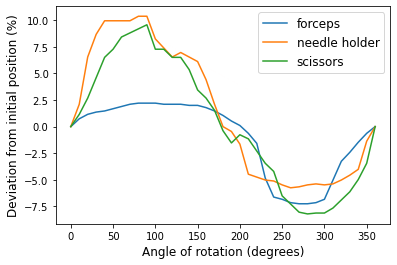

In [12]:
plt.plot(df["angle"], deviation_forceps_open, label= "forceps")
plt.plot(df["angle"], deviation_needle_open, label= "needle holder")
plt.plot(df["angle"], deviation_scissors_open, label= "scissors")
plt.xlabel("Angle of rotation (degrees)", fontsize="12")
plt.ylabel("Deviation from initial position (%)", fontsize="12")
plt.legend(fontsize="12")
plt.show()

In [13]:
base = df[df["angle"] == 0].iloc[0]
deviation_forceps_close = df["forceps_close"]/base["forceps_close"]-1
deviation_forceps_close = deviation_forceps_close*100
deviation_needle_close = df["needle_close"]/base["needle_close"]-1
deviation_needle_close = deviation_needle_close*100
deviation_scissors_close = df["scissors_close"]/base["scissors_close"]-1
deviation_scissors_close = deviation_scissors_close*100

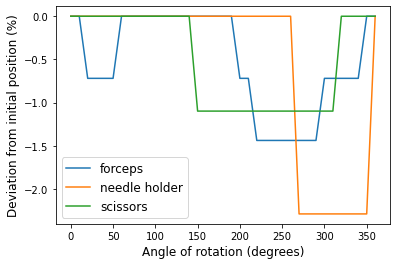

In [14]:
plt.plot(df["angle"], deviation_forceps_close, label= "forceps")
plt.plot(df["angle"], deviation_needle_close, label= "needle holder")
plt.plot(df["angle"], deviation_scissors_close, label= "scissors")
plt.xlabel("Angle of rotation (degrees)", fontsize="12")
plt.ylabel("Deviation from initial position (%)", fontsize="12")
plt.legend(fontsize="12")
plt.show()